## Chapter 4. Question 14
In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

### Part(a) 
(a) Create a binary variable, `mpg01`, that contains a 1 if `mpg` contains a value above its median, and a 0 if `mpg` contains a value below its median. You can compute the median using the `median()` method of the data frame. Note you may fnd it helpful to add a column `mpg01` to the data frame by assignment. Assuming you have stored the data frame as `Auto`, this can be done as follows:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ISLP import load_data

Auto = load_data('Auto')
Auto['mpg01'] = (Auto['mpg'] > Auto['mpg'].median()).astype(int)

### Part(b) 
(b) Explore the data graphically in order to investigate the association between `mpg01` and the other features. Which of the other features seem most likely to be useful in predicting `mpg01`? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   
mpg01         0.836939  -0.759194     -0.753477   -0.667053 -0.757757   

              acceleration      year    origin     mpg01  
mpg               0.423329  0.580541  0.565209  0.836939  
cylinders        -0.504683 -0.345647 -0.568932 -0.759194  
displacement     -0.543800 -0.369855 -0.614535 -0.753477  
horsepower       -0.689196 -0.416

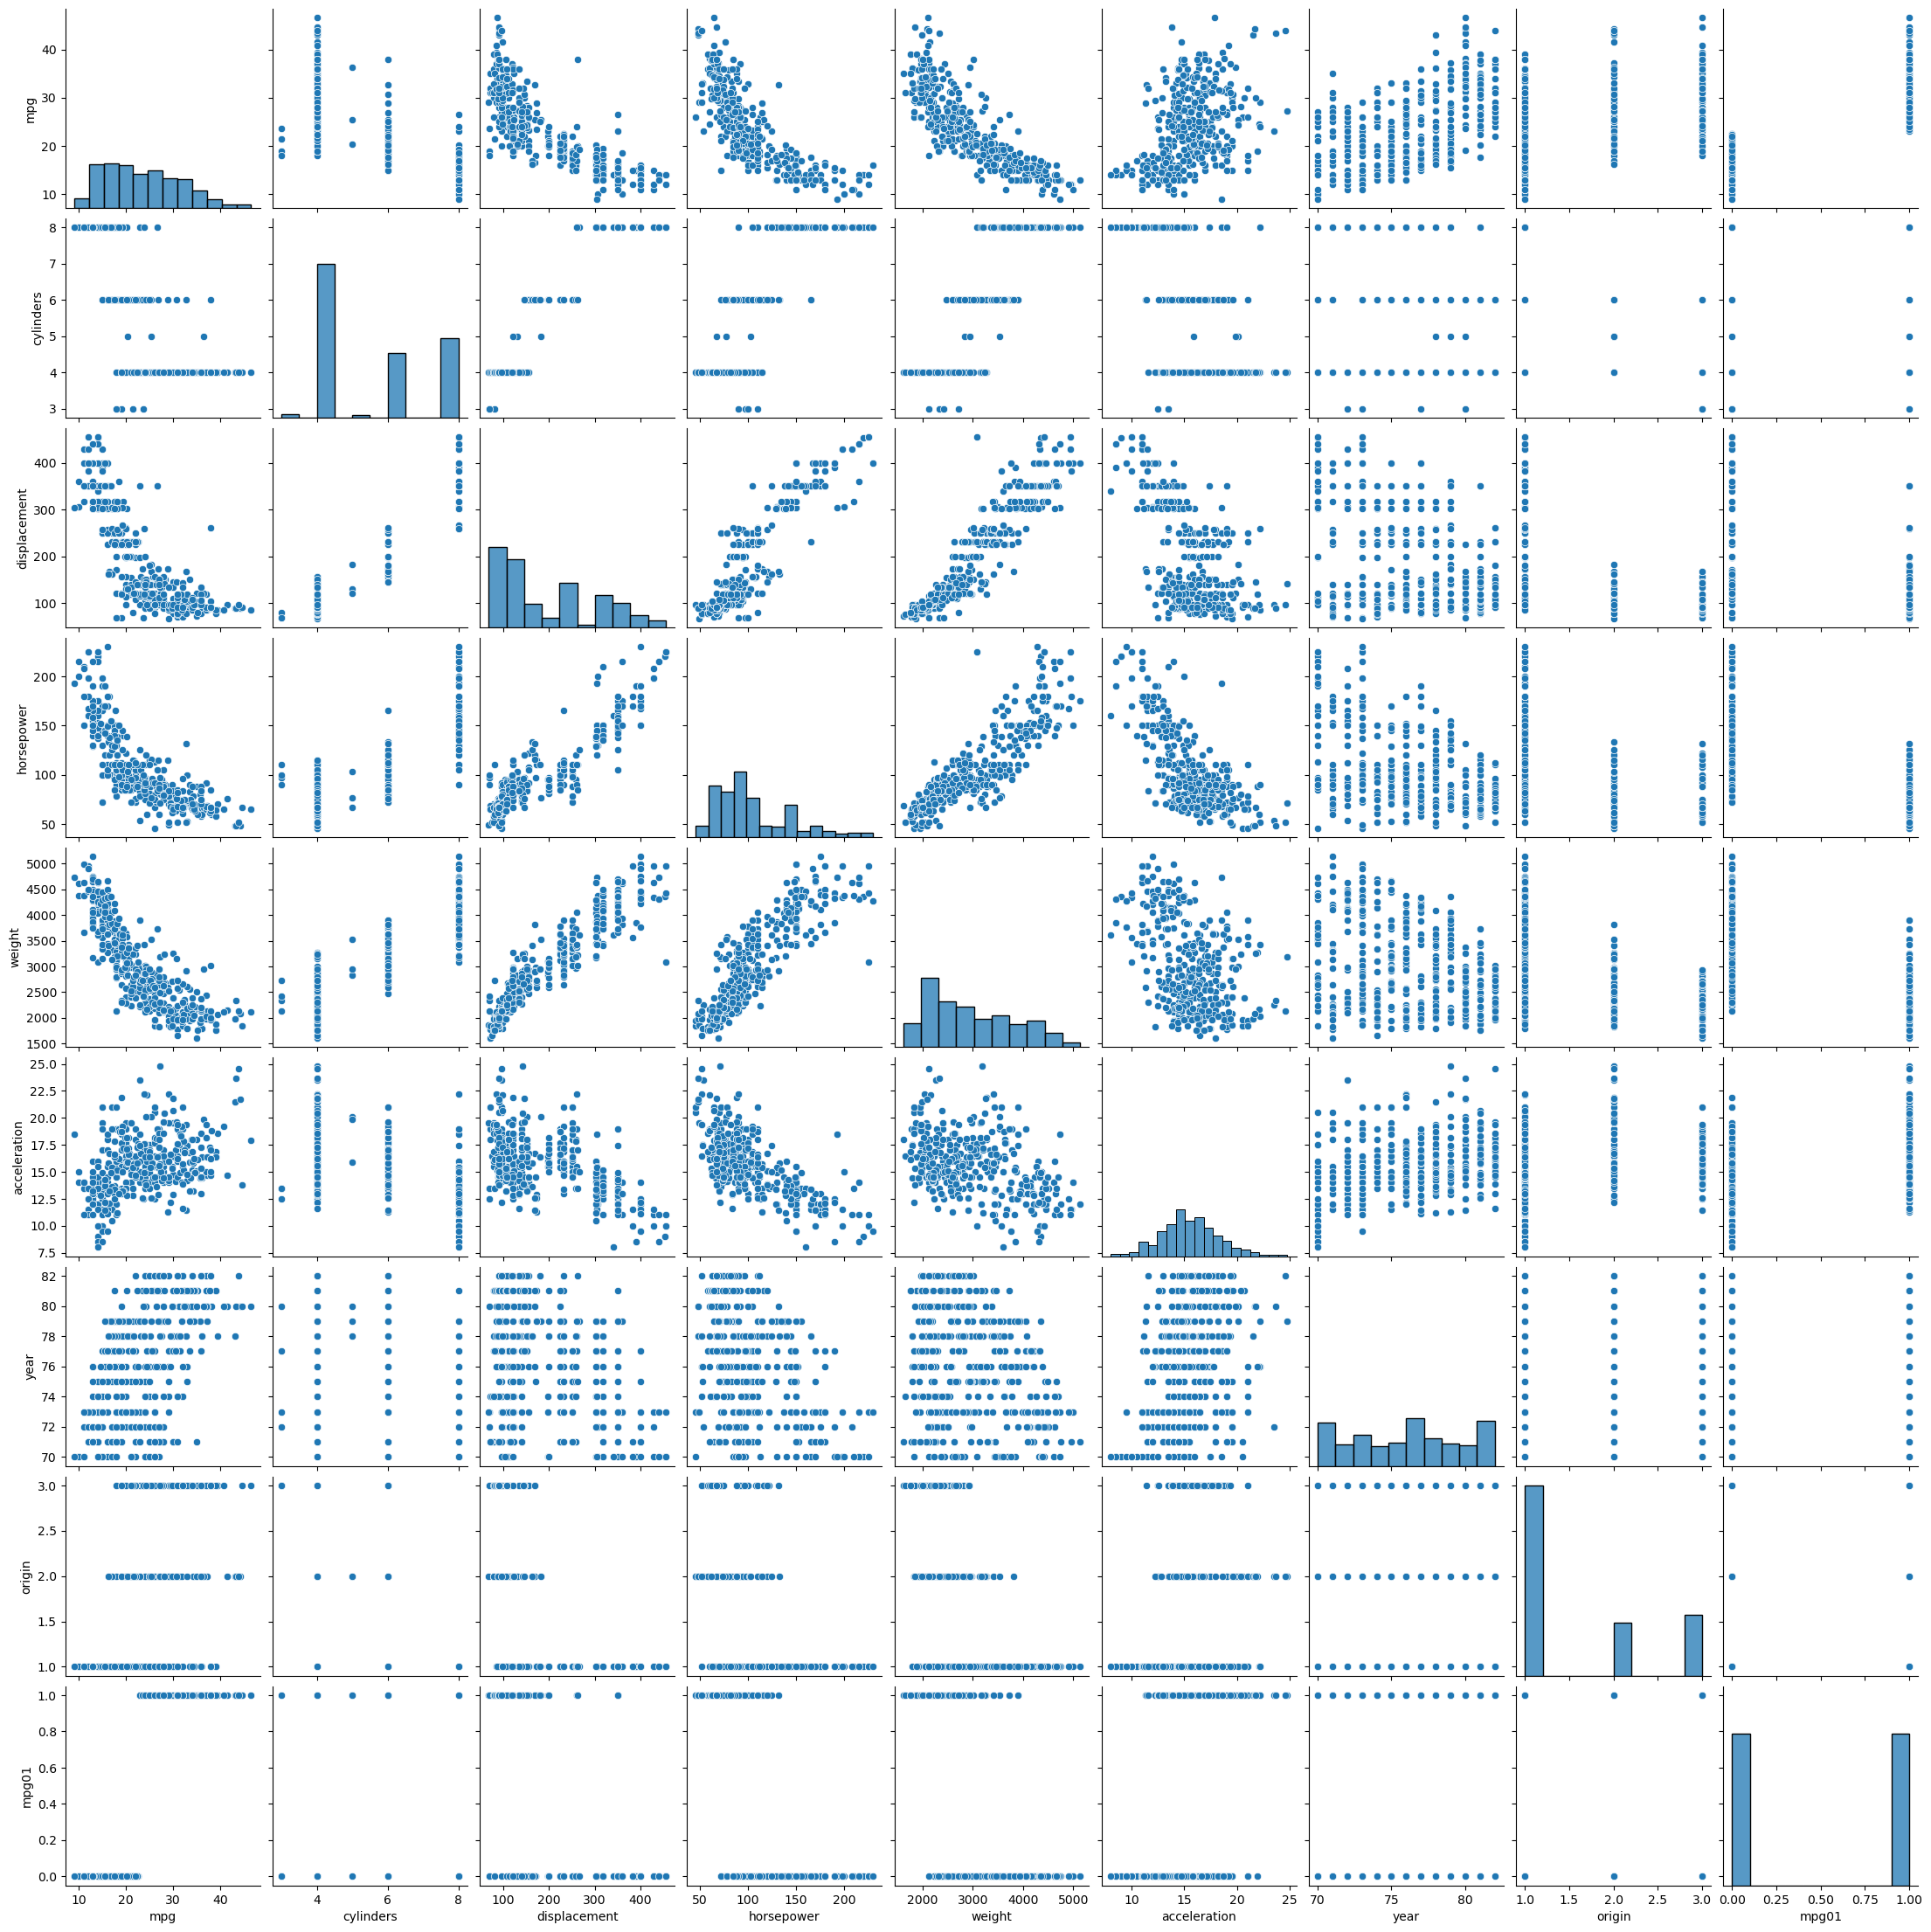

In [2]:
print(Auto.corr(numeric_only=True))
sns.pairplot(Auto)

### Part(c) 
(c) Split the data into a training set and a test set.

In [3]:
from sklearn.model_selection import train_test_split

X = Auto[['weight', 'displacement', 'horsepower', 'cylinders']]
y = Auto['mpg01']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Part(d) 
(d) Perform LDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Initialize and train the LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lda_model.predict(X_test)

# Calculate the test error (1 - accuracy)
test_accuracy = round(accuracy_score(y_test, y_pred), 4)
print(f"Test error of the naive Bayes model: {test_accuracy}")
test_error = round(1 - accuracy_score(y_test, y_pred), 4)
print(f"Test error of the LDA model: {test_error}")

Test error of the naive Bayes model: 0.8644
Test error of the LDA model: 0.1356


### Part(e) 
(e) Perform QDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Initialize and train the QDA model
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = qda_model.predict(X_test)

# Calculate the test error (1 - accuracy)
test_accuracy = round(accuracy_score(y_test, y_pred), 4)
print(f"Test error of the naive Bayes model: {test_accuracy}")
test_error = round(1 - accuracy_score(y_test, y_pred), 4)
print(f"Test error of the QDA model: {test_error}")

Test error of the naive Bayes model: 0.8559
Test error of the QDA model: 0.1441


### Part(f) 
(f) Perform logistic regression on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [6]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
logreg_model = LogisticRegression(solver='liblinear') #Specify a solver
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Calculate the test error (1 - accuracy)
test_accuracy = round(accuracy_score(y_test, y_pred), 4)
print(f"Test error of the naive Bayes model: {test_accuracy}")
test_error = round(1 - accuracy_score(y_test, y_pred), 4)
print(f"Test error of the logistic regression model: {test_error}")

Test error of the naive Bayes model: 0.839
Test error of the logistic regression model: 0.161


### Part(g) 
(g) Perform naive Bayes on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [7]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Calculate the test error (1 - accuracy)
test_accuracy = round(accuracy_score(y_test, y_pred), 4)
print(f"Test error of the naive Bayes model: {test_accuracy}")
test_error = round(1 - accuracy_score(y_test, y_pred), 4)
print(f"Test error of the naive Bayes model: {test_error}")

Test error of the naive Bayes model: 0.8644
Test error of the naive Bayes model: 0.1356


### Part(h) 
(h) Perform KNN on the training data, with several values of K, in order to predict `mpg01`. Use only the variables that seemed most associated with `mpg01` in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [8]:
from sklearn.neighbors import KNeighborsClassifier

k_values = list(range(1, 21))
test_errors = []

for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_pred)
    test_errors.append(test_error)
    print(f"Test error for K = {k}: {test_error}")

# Find the best K
best_k = k_values[test_errors.index(min(test_errors))]
print(f"\nThe best K value is {best_k} with a test error of {min(test_errors)}")

Test error for K = 1: 0.15254237288135597
Test error for K = 2: 0.15254237288135597
Test error for K = 3: 0.13559322033898302
Test error for K = 4: 0.14406779661016944
Test error for K = 5: 0.1610169491525424
Test error for K = 6: 0.15254237288135597
Test error for K = 7: 0.1694915254237288
Test error for K = 8: 0.1694915254237288
Test error for K = 9: 0.1694915254237288
Test error for K = 10: 0.1694915254237288
Test error for K = 11: 0.17796610169491522
Test error for K = 12: 0.17796610169491522
Test error for K = 13: 0.17796610169491522
Test error for K = 14: 0.17796610169491522
Test error for K = 15: 0.17796610169491522
Test error for K = 16: 0.1694915254237288
Test error for K = 17: 0.17796610169491522
Test error for K = 18: 0.1694915254237288
Test error for K = 19: 0.17796610169491522
Test error for K = 20: 0.17796610169491522

The best K value is 3 with a test error of 0.13559322033898302
